# Final project for HDEq Skills: 
`Due: Wednesday 4th December 2024 @ 12:00 (noon)`

## Instruction and marking scheme

Your submission (like your assignments) will be a Jupyter Notebook (.ipynb file).  For your analysis and discussion use Markdown cells instead of comments in the code.

For the presentation and coding style:
- The plots should be in a good size, properly labelled and markers/lines wisely chosen. It might be a good idea to combine some plots and put several curves together for easier comparison and conciseness. 
- Your code should be well commented with meaningful variable names and good structures. You don't need to over comment it though!
- The writing should be clear and concise with minimal language or typing mistakes.


It is important that you think about good academic practice when you construct your answers. The work you submit must reflect **your own understanding**, in line with the School's policy on academic misconduct: https://edin.ac/2LtVQMw. Any form of plagiarism that is detected by the software or markers will be reported to the school for the due process.

## Part 1: Wave equation with linear damping

Consider the following wave equation that includes a damping term


\begin{equation}
u_{tt} + \nu u_{t} = c^2 u_{xx}
\end{equation}

with the boundary conditions
\begin{equation}
u\left(x = 0, t\right) = 0 , \quad u\left(x = L, t\right) = 0,
\end{equation}
and the initial conditions
\begin{equation*}
u\left(x, t=0\right) = f(x) = \exp\left(\sin^2\left(\frac{2\pi x}{L}\right)\right)-1 , \quad u_t\left(x, t=0\right) = 0,
\end{equation*}

For this problem, let's set $L=10$, $\nu = 0.1$ and $c = 1$.

We use a method to solve this PDE that is known as "Galerkin". In so doing, we approximate the solution with

\begin{equation*}
u(x, t) \approx \sum_{n=1}^{N} f_n(t) \sin(\lambda_n x) 
\end{equation*}

and then derive an appropriate ODE for $f_n(t)$ to solve numerically. This is a form of separation of variables in which the equations for the functions of time are solved numerically rather than by hand. It can be shown that when $N \to \infty$ the above series converges to the exact solution. 

🚩 **Task 1.1 (1 mark)** Considering the above form of solution, find $\lambda_n$ in terms of $n$ and $L$. 

🚩 **Task 1.2 (1 mark)** Using the assumed form of solution and PDE, find an ODE that describes the evolution of $f_n(t)$ in time, (where $n = 1, 2, \dots, N $).

🚩 **Task 1.3 (2 marks)** Using the initial conditions of the PDE and your knowledge of Fourier series, find two initial conditions for $f_n$ and $\cfrac{df_n}{dt}$ at $t=0$. Your answer in this part might in the form of an integral, which you should not evaluate at this point (we will calculate this integral later numerically).

In [1]:
# Task 1.1

import sympy as sym
from sympy import symbols, pi
from sympy import integrate, sin, exp, sin
from IPython.display import display_latex
import numpy as np
sym.init_printing()

# Define variables
n, L = symbols('n L')

# lambda_n in terms of n and L
lambda_n = n * pi / L
lambda_n

#### 🚩 Task 1.2

Substituting the assumed form of the solution $u(x, t) = \sum_{n=1}^{N} f_n(t) \sin(\lambda_n x)$ into the given PDE $u_{tt}+\nu u_{t}=c^2 u_{tt}$ gives
$$
\sum_{n=1}^{N}f_n''(t)\sin(\lambda_n x) + \nu \sum_{n=1}^{N}f_n'(t)\sin(\lambda_n x) = c^2 \sum_{n=1}^{N}-\lambda_n^2 f_n(t)\sin(\lambda_n x).
$$

Due to orthogonality of $\sin(\lambda_n x)$, we get
$$
f_n''(t)+ \nu f_n'+\lambda_n^2 c^2f_n(t)=0.
$$

Therefore, the ODE describing the evolution of $f_n(t)$ is
$$
f_n''(t)+ \nu f_n'+\lambda_n^2 c^2f_n(t)=0, \: n=1,2,...,N.
$$

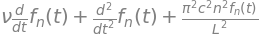

In [2]:
# Task 1.2

# Define additional symbols
t, nu, c = symbols('t nu c')
fn = symbols('f_n', cls=sym.Function)

# Define the ODE
f_n_ode = fn(t).diff(t, 2) + nu * fn(t).diff(t) + (lambda_n**2) * c**2 * fn(t)
f_n_ode

#### 🚩 Task 1.3

$$u(x,t=0)=f(x)=\sum_{n=1}^{N} f_n(0) \sin(\lambda_n x),$$
$$u_t=\sum_{n=1}^{N} \dot{f}_n(t) \sin(\lambda_n x)$$

Using Fourier coefficient,
$$f_n(t)=\frac{1}{L} \int_{-L}^{L}u(x,t) \sin{\lambda_n x}dx$$

Using two initial conditions,
$$f_n(0)=\frac{1}{L} \int_{-L}^{L}f(x) \sin{\lambda_n x}dx,$$
$$\dot{f}_n(0) = \frac{1}{L} \int_{-L}^{L}u_t(x, t=0) \sin{\lambda_n x}dx=\frac{2}{L} \int_{0}^{L}0dx$$

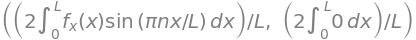

In [3]:
# Task 1.3

# Define symbols and functions
x, n, L, t = symbols('x n L t', real=True)
f_x = sym.Function('f_x')(x)
u_t = sym.Function('u_t')(x, t)

# Define the Fourier coefficients
f_n_0 = (2 / L) * integrate(f_x * sin(lambda_n * x), (x, 0, L))
f_n_0_prime = (2 / L) * integrate(u_t.subs(t, 0) * sin(lambda_n * x), (x, 0, L))
f_n_0_prime = f_n_0_prime.subs(u_t.subs(t, 0), 0)

f_n_0, f_n_0_prime

🚩 **Task 1.4 (3 marks)** Write a function that takes $n$ (the index of the terms in the series solution, for example $n=3$ corresponds to $f_3(0)$) as an input and returns $f_n(0)$. You might solve this part using different tools: 1) `sympy` module or 2) direct numerical calculation using  `scipy.integrate` (see the documentation [here](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)). Make sure your final result is a numerical real value (not symbolic expressions). Remember from your labs that you can use `.N()` method to evaluate a sympy expression (if you decide to use `sympy`, which is not the only way to complete this task).

Once you have written your function, use it to calculate $f_n(0)$ for $L=10$, $n=5$ and the given initial condition $u(x, t=0) = \exp\left(\sin^2\left(\frac{2\pi x}{L}\right)\right)-1$.

In [4]:
# Task 1.4

def calc_fn_0(n):
    """
    This function calculates f_n(0) for a given n (index)
    using SymPy integration.
    
    Parameters:
        k (int): Index n for the Fourier coefficient.
        
    Returns:
        float: Numerical value of f_n(0).
    """
    integrand = u_initial * sym.sin(n * sym.pi * x / L)
    
    # Symbolic integration
    integral = sym.integrate(integrand, (x, 0, L))

    # Calculate f_n(0)
    f_n_0 = (2 / L) * integral

    return f_n_0.evalf()

In [5]:
# Length of the domain
L = 10

# Define the initial condition u(x, t=0)
u_initial = sym.exp(sym.sin(2 * pi * x / L)**2) - 1

# Calculate f_n(0) for L=10, n=5
f_n_0 = calc_fn_0(5)

f_n_0

🚩 **Task 1.5 (4 marks)** Write a function to solve the ODEs that you derived in 'Task 1.2' for each $f_n(t)$. Your function takes $n$ (the index of terms in the solution series) and `t_vec` (the vector of times at which you want to have the solution). Then, it calculates the corresponding initial conditions ($f_n$ and $\cfrac{df}{dt}$ at $t=0$), solves the associated ODE and returns the solution at each point in `t_vec`. Use `odeint` to solve the ODE numerically. You may also use the function you wrote in the previous task.

Use the function to plot $f_1(t)$, $f_2(t)$ and $f_3(t)$ for `t_vec = np.linspace(0, 100, 1001)`.

In [6]:
# Task 1.5

import matplotlib.pyplot as plt
from scipy.integrate import odeint
# and this is the line in case the figure does not show up!
%matplotlib inline

nu = .1
c = 1
L = 10
    
def dF_dt(system_state, time, term_index):
    """
    This function defines the RHS of the system of ODEs for f_n's.
    
    Parameters:
        system_state (list): [coefficient, coefficient_derivative] at a given time.
        time (float): Time point.
        term_index (int): Index of the Fourier term.

    Returns:
        list: [coefficient_derivative, second_derivative_of_coefficient]
    """
    coefficient, coefficient_derivative = system_state
    eigenvalue = (term_index * np.pi / L)
    second_derivative_of_coefficient = -nu * coefficient_derivative - (c**2) * eigenvalue**2 * coefficient
    # print(f"dF_dt: time={time}, term_index={term_index}, coefficient={coefficient}, coefficient_derivative={coefficient_derivative}, second_derivative_of_coefficient={second_derivative_of_coefficient}")
    return [coefficient_derivative, second_derivative_of_coefficient]
    
def fn_solve(term_index, t_vec):
    """
    This function solves the ODE for f_k(t) for all the times in
    't_vec' using odeint.
    
    Parameters:
        term_index (int): Index of the Fourier term n.
        t_vec (np.ndarray): Vector of time points.

    Returns:
        np.ndarray: Solution of f_k(t) at all points in t_vec.
    """
    coefficient_initial = calc_fn_0(term_index)
    coefficient_derivative_initial = 0

    initial_conditions = [coefficient_initial, coefficient_derivative_initial]
    # print(f"Initial conditions for term_index={term_index}: initial_conditions = {initial_conditions}")

    # Solve the ODE
    coefficient_solution = odeint(dF_dt, initial_conditions, t_vec, args=(term_index,))
    
    return coefficient_solution[:, 0]

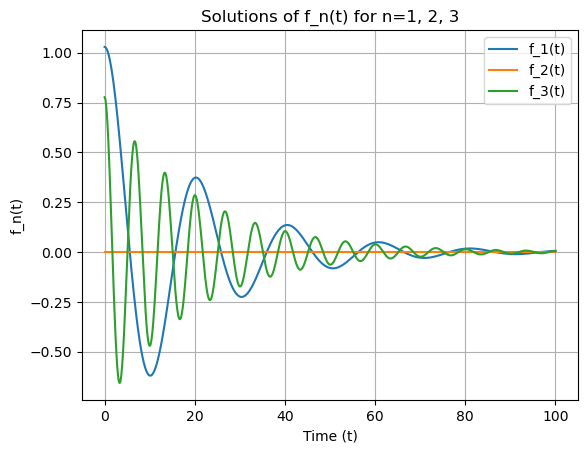

In [7]:
t_vec = np.linspace(0, 100, 1001)
#print(f"t_vec: {t_vec}")

# Solve and plot f_1(t), f_2(t), f_3(t)
for term_index in [1, 2, 3]:
    coefficient_solution = fn_solve(term_index, t_vec)
    plt.plot(t_vec, coefficient_solution, label=f'f_{term_index}(t)')

plt.xlabel('Time (t)')
plt.ylabel('f_n(t)')
plt.title('Solutions of f_n(t) for n=1, 2, 3')
plt.legend()
plt.grid()
plt.show()

🚩 **Task 1.6 (4 marks)** Write a function that takes $N$ (the total number of terms in the sine series of the solution), `t_vec` and `x_vec` (which is the vector of points in space) as inputs and returns the solution $u(x,t)$ of the PDE at the times `t_vec` and points `x_vec`. Your function output should be a $N_T \times N_X$ numpy array, where $N_T$ is the number of points in time (i.e. the size of `t_vec`) and  $N_X$ is the number of points in space (i.e. the size of `x_vec`). Make good use of the functions you already wrote in the previous tasks.

With this function, find the solution for 

`x_vec = np.linspace(0, L, 201)`

`t_vec = np.linspace(0, 100, 1001)` 

`N =7`

Make an animation to show how $u(x,t)$ changes in time (each frame of animation is the solution at all spatial points but for one specific point in time)

In [8]:
# Task 1.6

import matplotlib.pyplot as plt
import matplotlib.animation as animation

def waveq_dam_solve(N, t_vec, x_vec):
    """
    This function solves the damped wave equation
    using the Galerkin method.
    
    Parameters:
        N (int): Total number of terms in the sine series of the solution.
        t_vec (np.ndarray): Vector of time points.
        x_vec (np.ndarray): Vector of spatial points.

    Returns:
        np.ndarray: Solution u(x, t) as a 2D array of size (len(t_vec), len(x_vec)).
    """
    u_x_t = np.zeros((len(t_vec), len(x_vec)))

    for n in range(1, N + 1):
        f_n_t = fn_solve(n, t_vec)

        lambda_n = (n * np.pi / L)
        for i, x in enumerate(x_vec):
            u_x_t[:, i] += f_n_t * np.sin(lambda_n * x)

    return u_x_t

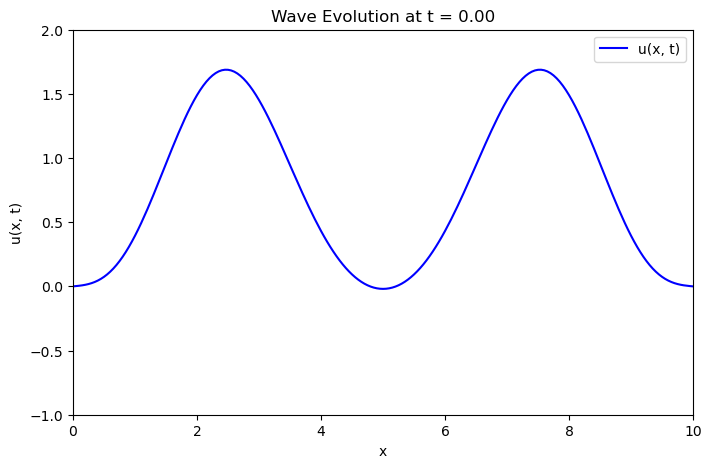

MovieWriter Pillow unavailable; using Pillow instead.


In [9]:
# Assuming the PDE's solution is stored in u_x_t[:,:],
# compare the approx. solution at t=0 with the initial condition

# Define parameters
L = 10
x_vec = np.linspace(0, L, 201)
t_vec = np.linspace(0, 100, 1001)
N = 7

# Solve the PDE
u_x_t = waveq_dam_solve(N, t_vec, x_vec)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x_vec, u_x_t[0, :], color="blue", label="u(x, t)")
ax.set_xlim(0, L)
ax.set_ylim(-1.0, 2.0)
ax.set_title("Wave Evolution Over Time")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.legend()

# Animation function to update the data
def animate(frame):
    line.set_ydata(u_x_t[frame, :])
    ax.set_title(f"Wave Evolution at t = {t_vec[frame]:.2f}")
    return line,

# Create the animation
frames = len(t_vec)
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=500, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF
ani.save('wave_evolution.gif', writer='Pillow', fps=20)

🚩 **Task 1.7 (2 marks)** Examine how the solution changes for different values of $N$. Consider $N=3$, $N=7$ and $N=11$. Show the animation of the solution for all the three cases in one plot and compare them with each other. Discuss and analyse your results (for example, are three terms enough to get an acceptable solution? What about seven?)

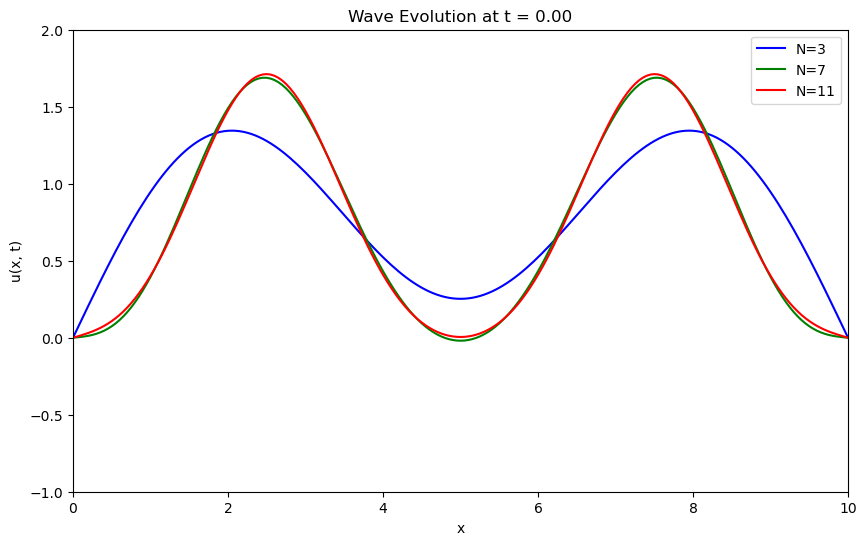

MovieWriter Pillow unavailable; using Pillow instead.


In [10]:
# Task 1.7

import matplotlib.pyplot as plt
import matplotlib.animation as animation

def compare_waveq_dam_solve(N_values, t_vec, x_vec):
    """
    This function compares the solutions of the damped wave equation
    for different values of N.

    Parameters:
        N_values (list): List of integers, each representing the total
                         number of terms in the sine series of the solution.
        t_vec (np.ndarray): Vector of time points.
        x_vec (np.ndarray): Vector of spatial points.

    Returns:
        list: A list of solutions u(x, t) for each N in N_values.
    """
    solutions = []
    for N in N_values:
        solutions.append(waveq_dam_solve(N, t_vec, x_vec))
    return solutions

# Define parameters
N_values = [3, 7, 11]  # Different values of N
x_vec = np.linspace(0, L, 201)
t_vec = np.linspace(0, 100, 1001)

# Solve the PDE for different values of N
solutions = compare_waveq_dam_solve(N_values, t_vec, x_vec)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
lines = []
colors = ['blue', 'green', 'red']
labels = [f'N={N}' for N in N_values]

# Initialise lines for each N
for i in range(len(N_values)):
    line, = ax.plot(x_vec, solutions[i][0, :], color=colors[i], label=labels[i])
    lines.append(line)

ax.set_xlim(0, L)
ax.set_ylim(-1.0, 2.0)
ax.set_title("Comparison of Wave Evolution for Different N")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.legend()

# Animation function to update the data
def animate_comparison(frame):
    for i, line in enumerate(lines):
        line.set_ydata(solutions[i][frame, :])
    ax.set_title(f"Wave Evolution at t = {t_vec[frame]:.2f}")
    return lines

# Create the animation
frames = len(t_vec)
ani_comparison = animation.FuncAnimation(fig, animate_comparison, frames=frames, interval=500, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF
ani_comparison.save('wave_comparison.gif', writer='Pillow', fps=20)

As $N$ increases, the Fourier series shows more high frequency components of the initial condition.

In the resulting plot, all values of $N$ provide reasonable solutions. However, for $N=3$, the solution deviates from the initial condition due to the use of fewer terms in the Fourier series. $N=7$ already produces an acceptable solution, but increasing $N$ further to $N=11$ results in a slightly more precise and refined solution. However, this comes with a trade-off in computational cost.

🚩 **Task 1.8 (1 marks)** Change the damping parameter to $\nu = 1$, and repeat the 'task 1.6' (for $N=7$ and keep all other parameters the same). In few sentences, explain the changes caused by increasing the damping.

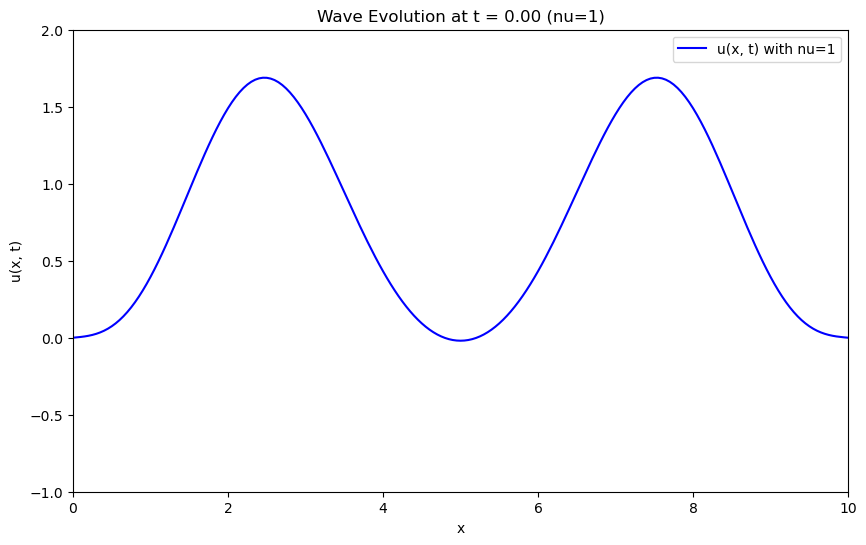

MovieWriter Pillow unavailable; using Pillow instead.


In [11]:
# Task 1.8: Correctly updating nu

# Update the dF_dt function to accept nu as a parameter
def dF_dt(system_state, time, term_index, nu):
    """
    This function defines the RHS of the system of ODEs for f_n's.
    
    Parameters:
        system_state (list): [coefficient, coefficient_derivative] at a given time.
        time (float): Time point.
        term_index (int): Index of the Fourier term.
        nu (float): Damping parameter.

    Returns:
        list: [coefficient_derivative, second_derivative_of_coefficient]
    """
    coefficient, coefficient_derivative = system_state
    eigenvalue = (term_index * np.pi / L)
    second_derivative_of_coefficient = -nu * coefficient_derivative - (c**2) * eigenvalue**2 * coefficient
    return [coefficient_derivative, second_derivative_of_coefficient]

# Update the fn_solve function to pass nu
def fn_solve(term_index, t_vec, nu):
    """
    This function solves the ODE for f_k(t) for all the times in
    't_vec' using odeint.
    
    Parameters:
        term_index (int): Index of the Fourier term n.
        t_vec (np.ndarray): Vector of time points.
        nu (float): Damping parameter.

    Returns:
        np.ndarray: Solution of f_k(t) at all points in t_vec.
    """
    coefficient_initial = calc_fn_0(term_index)
    coefficient_derivative_initial = 0

    initial_conditions = [coefficient_initial, coefficient_derivative_initial]

    # Solve the ODE
    coefficient_solution = odeint(dF_dt, initial_conditions, t_vec, args=(term_index, nu))
    return coefficient_solution[:, 0]

# Update the waveq_dam_solve function to pass nu
def waveq_dam_solve(N, t_vec, x_vec, nu):
    """
    This function solves the damped wave equation
    using the Galerkin method.
    
    Parameters:
        N (int): Total number of terms in the sine series of the solution.
        t_vec (np.ndarray): Vector of time points.
        x_vec (np.ndarray): Vector of spatial points.
        nu (float): Damping parameter.

    Returns:
        np.ndarray: Solution u(x, t) as a 2D array of size (len(t_vec), len(x_vec)).
    """
    u_x_t = np.zeros((len(t_vec), len(x_vec)))

    for n in range(1, N + 1):
        f_n_t = fn_solve(n, t_vec, nu)

        lambda_n = (n * np.pi / L)
        for i, x in enumerate(x_vec):
            u_x_t[:, i] += f_n_t * np.sin(lambda_n * x)

    return u_x_t

# Task 1.8: Solve for nu=1.0
nu = 1.0  # Updated damping parameter

# Solve the PDE for N=7 with updated nu
N = 7
u_x_t_damped = waveq_dam_solve(N, t_vec, x_vec, nu)

# Create figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6))
line_damped, = ax.plot(x_vec, u_x_t_damped[0, :], color="blue", label="u(x, t) with nu=1")
ax.set_xlim(0, L)
ax.set_ylim(-1.0, 2.0)
ax.set_title("Wave Evolution Over Time (Increased Damping)")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.legend()

# Animation function to update the data
def animate_damped(frame):
    line_damped.set_ydata(u_x_t_damped[frame, :])
    ax.set_title(f"Wave Evolution at t = {t_vec[frame]:.2f} (nu=1)")
    return line_damped,

# Create the animation
frames = len(t_vec)
ani_damped = animation.FuncAnimation(fig, animate_damped, frames=frames, interval=500, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF
ani_damped.save('wave_evolution_damped.gif', writer='Pillow', fps=20)

As shown in the `wave_evolution.gif` and `wave_evolution_damped.gif` files, oscillations for $\nu=0.1$ persist longer, with the wave amplitude decaying very slowly around $t=100$. In contrast, oscillations for $\nu=1.0$ decay much faster, around $t=25$, with significantly fewer visible oscillations.

## Part 2: Lorenz system


The Lorenz system is given by the coupled set of ODEs
\begin{equation}
  \frac{\mathrm{d}x}{\mathrm{d}t} = -\sigma x + \sigma y, \qquad
  \frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho - z) - y, \qquad
  \frac{\mathrm{d}z}{\mathrm{d}t} = xy - \beta z,
\end{equation}
where ($\rho, \sigma, \beta$) are system parameters. Lorenz derived these equation as a simplified mathematical model for [atmospheric convection](https://en.wikipedia.org/wiki/Atmospheric_convection), which is an aspect of weather.  While the Lorenz system is deterministic, you will find in this problem that in certain sets of parameters there is sensitive dependence of the solution on the initial condition. Assuming this system is a representation of weather, small errors invariably arise (e.g. numerical discretisation, measurements inaccuracy), grow and affect long term solutions (cf. loss of predictability in weather forecasting). However, there are statistical properties (cf. the climatology) that may be robust and may be described accordingly.

--------------------
### Case of stable solution


Consider the parameters $\sigma = 8$, $\beta = 2$ and $\rho = 12$.


🚩 **Task 2.1 (1 mark)** Find all the critical points of this system.

🚩 **Task 2.2 (2 marks)** Using a numerical method of your choice, find the solution starting from $x(t=0) = y(t=0) = z(t=0) = 10$ up to $t=20$. Plot the solution in *x-y*, *y-z* and *x-z* planes (so you need three plots). Where does this initial condition end up in? Can you express the exact location of this solution as $t \to \infty$? Make sure your timestep is small enough to have robust results. You can check this by running your code for several different timesteps.

🚩 **Task 2.1**
To find the critical points, we solve the system of equations where all derivatives are zero:

$$\frac{dx}{dt}=0, \: \frac{dy}{dt}=0, \: \frac{dz}{dt}=0$$

Critical points are:
$$
-\sigma x + \sigma x = 0, \: x(\rho -z)-y=0, \: xy-\beta z = 0
$$


$\Rightarrow (0, 0, 0), \:
(-\sqrt{\beta(\rho - 1)}, -\sqrt{\beta(\rho - 1)}, \rho - 1), \:
(\sqrt{\beta(\rho - 1)}, \sqrt{\beta(\rho - 1)}, \rho - 1)$

Therefore, critical points are $(0,0,0), (\sqrt{22}, \sqrt{22}, 11), (-\sqrt{22}, -\sqrt{22}, 11)$

In [12]:
# Task 2.1

import sympy as sym

# Define variables
x, y, z = sym.symbols('x y z')
rho = 12.0
sigma = 8.0
beta = 2.0

# Define equations for the Lorenz system
eq1 = -sigma * x + sigma * y
eq2 = x * (rho - z) - y
eq3 = x * y - beta * z

# Solve the system of equations
critical_points = sym.solve([eq1, eq2, eq3], (x, y, z))

print("Critical Points:")
for point in critical_points:
    print(point)

Critical Points:
(-4.69041575982343, -4.69041575982343, 11.0000000000000)
(0.0, 0.0, 0.0)
(4.69041575982343, 4.69041575982343, 11.0000000000000)


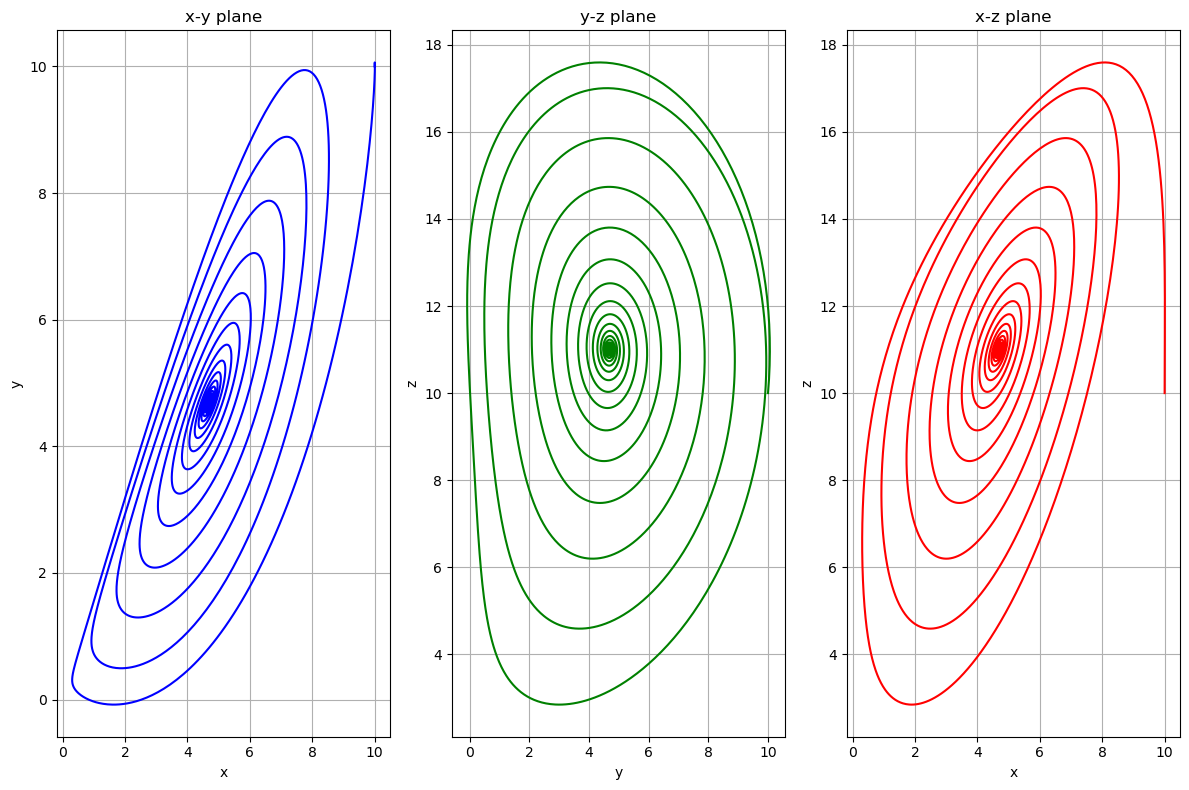

Final State as t -> infinity:
x(t=20): 4.6653, y(t=20): 4.6650, z(t=20): 10.9777


In [13]:
# Task 2.2

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# We'll solve the Lorenz system numerically
# using odeint from scipy.integrate


rho = 12.0
sigma = 8.0
beta = 2.0

# Define the Lorenz system
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = -sigma * x + sigma * y
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial condition
initial_state = [10, 10, 10]  # x(0)=y(0)=z(0)=10

# Time points
t = np.linspace(0, 20, 5000)

# Solve the system
solution = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))

# Extract x, y, z from the solution
x, y, z = solution.T

# Plotting trajectories in the x-y, y-z, and x-z planes
plt.figure(figsize=(12, 8))

# x-y plane
plt.subplot(1, 3, 1)
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x-y plane")
plt.grid()

# y-z plane
plt.subplot(1, 3, 2)
plt.plot(y, z, color="green")
plt.xlabel("y")
plt.ylabel("z")
plt.title("y-z plane")
plt.grid()

# x-z plane
plt.subplot(1, 3, 3)
plt.plot(x, z, color="red")
plt.xlabel("x")
plt.ylabel("z")
plt.title("x-z plane")
plt.grid()

plt.tight_layout()
plt.show()

# Print final state as t -> infinity
print("Final State as t -> infinity:")
print(f"x(t=20): {x[-1]:.4f}, y(t=20): {y[-1]:.4f}, z(t=20): {z[-1]:.4f}")

🚩 **Task 2.3 (4 marks)** Consider two different numerical methods: forward Euler and Ruge-kutta (4th order) methods. Set the initial condition to $x = y = z = 100$ and the final time to 0.3. The Ruge-kutta method with timestep h=10^{-6} is accurate enough that **we can regard it as an exact solution**. Using this *estimate numerically* the **global error** for variable $x$ and plot it in log-scale as a function of timestep. In so doing, consider the values `[0.002, 0.001, .0005, 0.0002, 0.0001]` for timesteps. 

Note that the order of error can be estimated from the slope of plots in log-scales. If a function is proportional to $h^{6}$, then in log-scale it looks linear and have the slope of $6$.

What is the slope of global error vs timestep for each method? Why do you get these slopes? You can estimate the slopes by drawing linear guidelines. For example, if you draw $h^{6}$ and your curve is close to this guideline, then you can conclude that the slope is close to $6$. You need to shift your guidelines up and down to bring them closer to the results of numerical solutions. Are the results different than the slopes you expect for the local error as a function of timestep? Can you reason why?


(Remember that you have already implemented forward Euler and Ruge-kutta in your lab notebooks. There is also something called "copy-paste".)

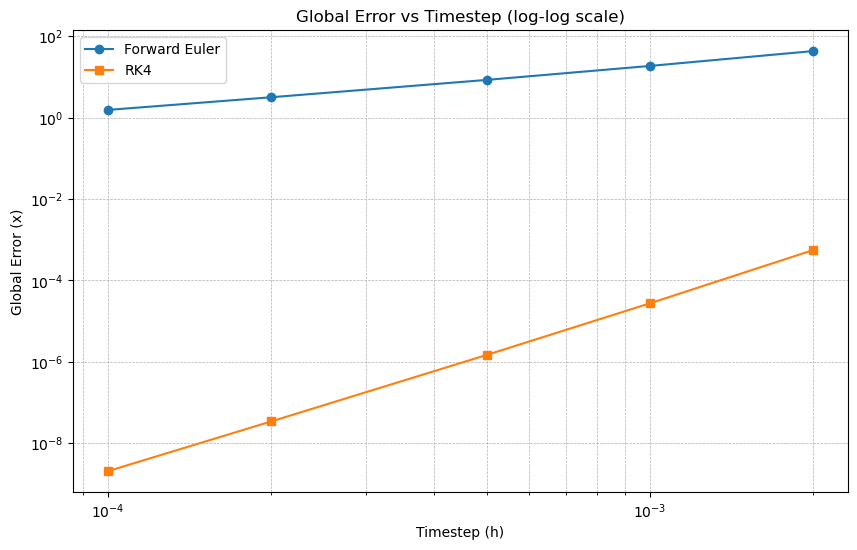

In [14]:
# Task 2.3

def lorenz_system(state, t, sigma, beta, rho):
    x, y, z = state
    dx_dt = -sigma * x + sigma * y
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

# Forward Euler method
def ode_euler(func, times, y0, sigma, beta, rho):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size
    nT = times.size
    y = np.zeros((nT, n))
    y[0, :] = y0
    for k in range(nT - 1):
        dt = times[k + 1] - times[k]
        y[k + 1, :] = y[k, :] + dt * func(y[k, :], times[k], sigma, beta, rho)
    return y

# Runge-Kutta 4th order method
def ode_rk4(func, times, y0, sigma, beta, rho):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size
    nT = times.size
    y = np.zeros((nT, n))
    y[0, :] = y0
    for k in range(nT - 1):
        dt = times[k + 1] - times[k]
        f1 = func(y[k, :], times[k], sigma, beta, rho)
        f2 = func(y[k, :] + 0.5 * dt * f1, times[k] + 0.5 * dt, sigma, beta, rho)
        f3 = func(y[k, :] + 0.5 * dt * f2, times[k] + 0.5 * dt, sigma, beta, rho)
        f4 = func(y[k, :] + dt * f3, times[k] + dt, sigma, beta, rho)
        y[k + 1, :] = y[k, :] + dt / 6 * (f1 + 2 * f2 + 2 * f3 + f4)
    return y

# Parameters
rho = 12.0
sigma = 8.0
beta = 2.0
initial_state = [100.0, 100.0, 100.0]
final_time = 0.3
t_rk4 = np.linspace(0, final_time, int(final_time / 1e-6) + 1)

# Compute the exact solution using RK4 with h=1e-6
solution_rk4_exact = ode_rk4(lorenz_system, t_rk4, initial_state, sigma, beta, rho)
x_exact = solution_rk4_exact[-1, 0]

# Timesteps to evaluate
timesteps = [0.002, 0.001, 0.0005, 0.0002, 0.0001]

# Global error for forward Euler
global_error_euler = []
for h in timesteps:
    t_euler = np.linspace(0, final_time, int(final_time / h) + 1)
    solution_euler = ode_euler(lorenz_system, t_euler, initial_state, sigma, beta, rho)
    x_euler = solution_euler[-1, 0]
    global_error_euler.append(np.abs(x_euler - x_exact))

# Global error for RK4
global_error_rk4 = []
for h in timesteps:
    t_rk4 = np.linspace(0, final_time, int(final_time / h) + 1)
    solution_rk4 = ode_rk4(lorenz_system, t_rk4, initial_state, sigma, beta, rho)
    x_rk4 = solution_rk4[-1, 0]
    global_error_rk4.append(np.abs(x_rk4 - x_exact))

# Plot the global error
plt.figure(figsize=(10, 6))
plt.loglog(timesteps, global_error_euler, label='Forward Euler', marker='o')
plt.loglog(timesteps, global_error_rk4, label='RK4', marker='s')
plt.xlabel('Timestep (h)')
plt.ylabel('Global Error (x)')
plt.title('Global Error vs Timestep (log-log scale)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

i. From the log-log plot, the slope of the global error vs timestep is: 

    - Forward Euler: ~1
    - RK4 (Runge-Kutta 4th Order): ~4

ii. These slopes correspond to the global error order of the numerical methods.

    - Forward Euler: First-order accurate, therefore, the global error scales as O(h). The log-log plot shows this linear relationship with a slope of ~1.
    - RK4 (Runge-Kutta 4th Order): Fourth-order method, therefore, the global error scales as O(h^4). The log-log plot shows this linear relationship with a slope of ~4.
    
iii. Global error slopes differ from the local error slopes because the local error is the error made in a single timestep, but the global error accumulates over all timesteps across the integration interval. Hence, the global error order is typically less than the local error order.

    - Forward Euler: Local error scales as O(h^2), but global error scales as O(h)
    - RK4 (Runge-Kutta 4th Order): Local error scales as O(h^5), but global error scales as O(h^4).
    

--------------------
### Case of chaotic behaviour and strange attractor


Consider the set of parameters $\sigma = 10$, $\beta = 8/3$ and $\rho = 28$ and stick to Runge-Kutta scheme with timestep of $h = 10^{-4}$ for this part. 

**Task 2.4 (2 marks)** Draw the three-dimensional phase portraits using $x = y = z = 1$ as initial condition. You can use the script below to plot 3D curves.


**Task 2.5 (3 marks)** Change the initial condition as $x = 1 + \epsilon, y = 1, z = 1$, where $\epsilon$ is $10^{-1}$, $10^{-5}$ and $10^{-12}$. Draw the phase portrait for each initial condition and compare it to what you got for Task 2.4. Do they look different? Representing the outputs of these new solutions (with new initial conditions) with $x_1$, $y_1$ and $z_1$ and the solution starting from $x = y = z = 1$ with $x^*$, $y^*$ and $z^*$, compute a measure of difference between these solutions given by
  
\begin{equation*}
\mathcal{e}(t) = \sqrt{(x^*(t) - x_1(t))^2 +  (y^*(t) - y_1(t))^2 + (z^*(t) - z_1(t))^2}.
\end{equation*}
  
Plot the time-series diagrams of $\mathcal{e}(t)$ for three different values of $\epsilon$. From the behaviour of $\mathcal{e}(t)$ answer the following questions:

- If two initial conditions are very close, do their corresponding trajectories stay close to each other in time? 

- Do you see an upper bound for $\mathcal{e}(t)$? What does this imply?
  
  
*The moral of the story is that the exact realisations (the "weather") can have sensitive dependence on initial conditions, and in reality errors always exist, so loss of accuracy in weather prediction is fairly rapid. However there are gross features that remain roughly invariant and can be described, for example the butterfly attractor that you see in your results (the "climate").*

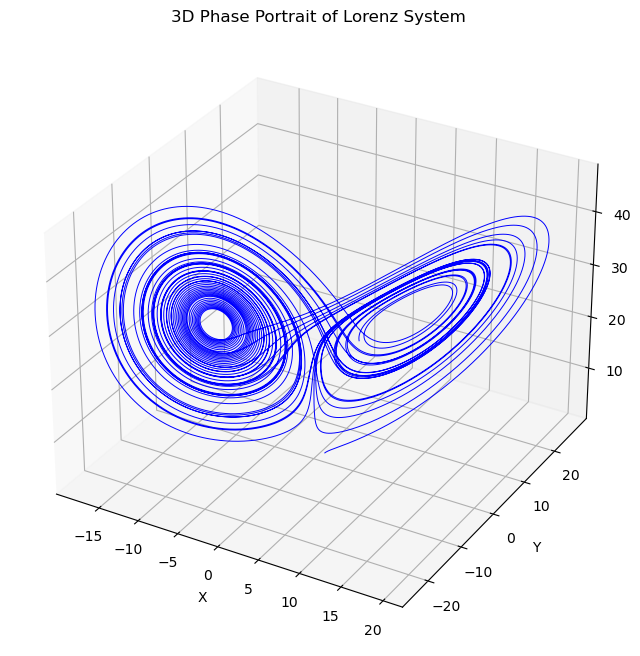

In [15]:
# Task 2.4
# some hint how to create 3D plots for phase portraits

from mpl_toolkits.mplot3d import Axes3D

# Parameters for chaotic behavior
sigma = 10.0
beta = 8 / 3
rho = 28.0

# Define the Lorenz system
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = -sigma * x + sigma * y
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial condition
initial_state = [1.0, 1.0, 1.0]

# Time points
t = np.linspace(0, 50, int(50 / 1e-4) + 1)

# Solve the system
solution = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
x, y, z = solution.T

# Plot the 3D phase portrait
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Phase Portrait of Lorenz System')
plt.show()

Results for ε = 0.1:
Error at t=0: 1.0000e-01
Error at t=10: 1.6994e-01
Error at t=20: 1.3731e+01
--------------------------------------------------


<Figure size 1000x800 with 0 Axes>

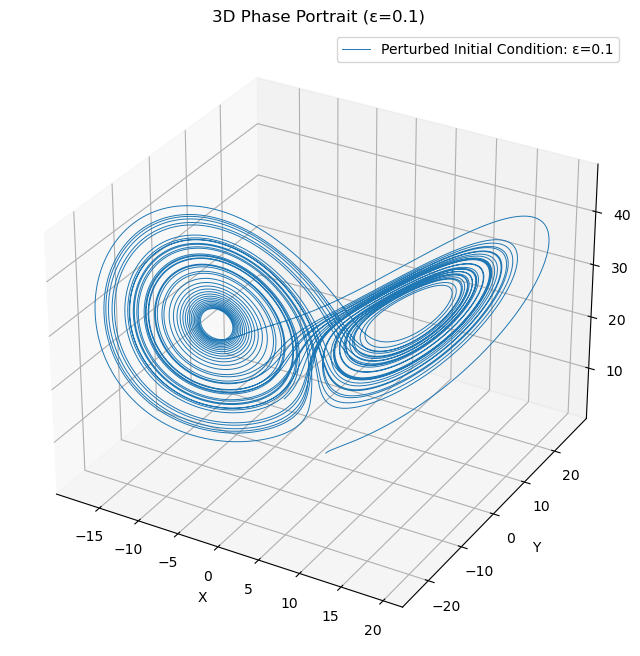

Results for ε = 1e-05:
Error at t=0: 1.0000e-05
Error at t=10: 1.8651e-05
Error at t=20: 2.3386e+01
--------------------------------------------------


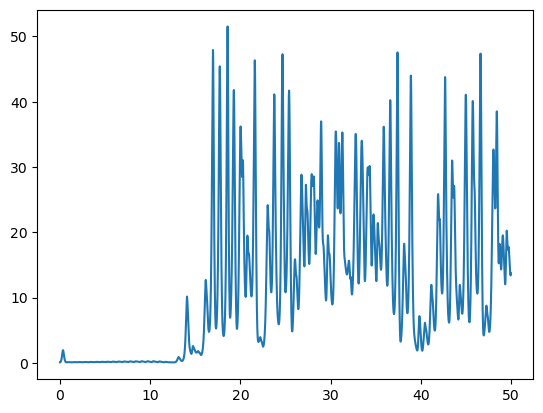

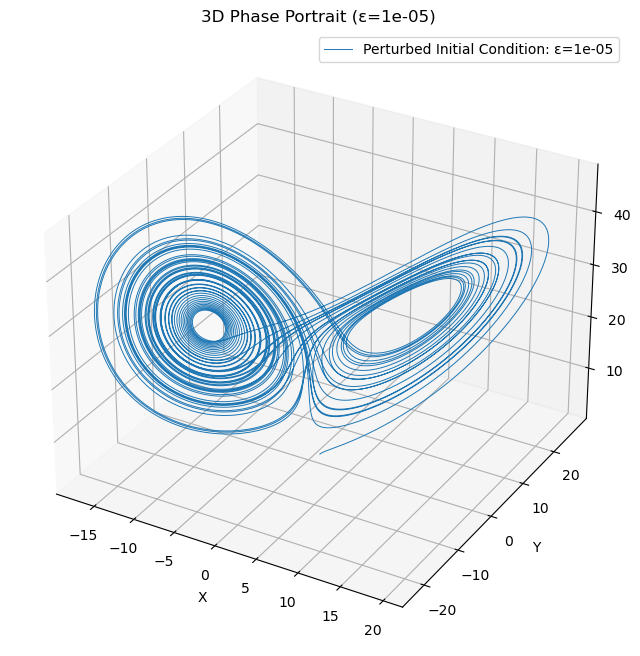

Results for ε = 1e-12:
Error at t=0: 1.0001e-12
Error at t=10: 2.5612e-07
Error at t=20: 2.4549e+01
--------------------------------------------------


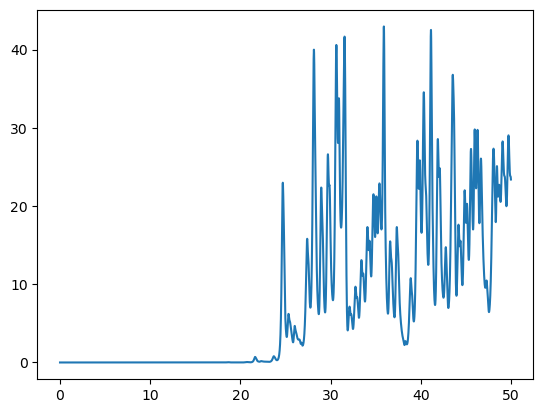

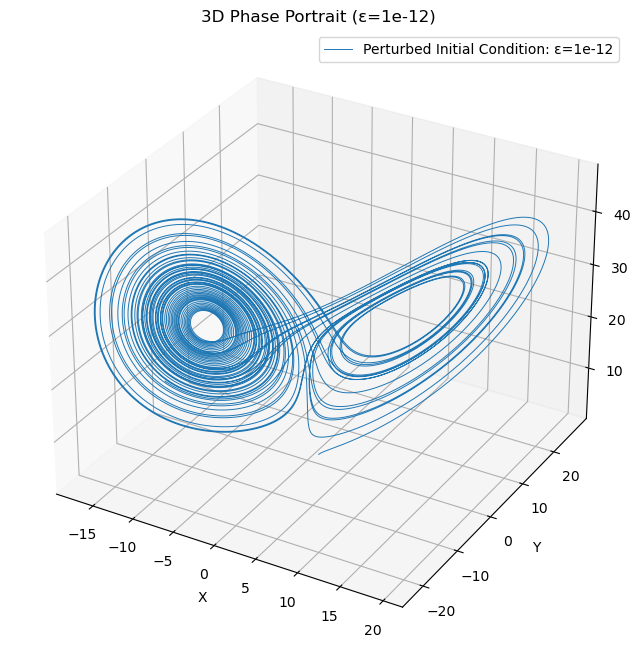

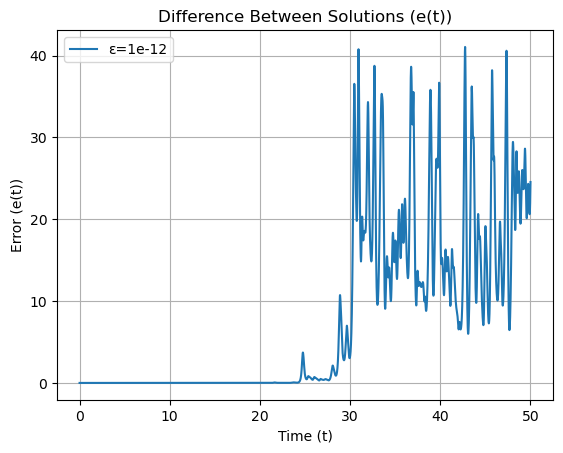

In [16]:
# Task 2.5

# Function to compute the measure of difference (e(t))
def compute_error(solution1, solution2):
    return np.sqrt((solution1[:, 0] - solution2[:, 0])**2 +
                   (solution1[:, 1] - solution2[:, 1])**2 +
                   (solution1[:, 2] - solution2[:, 2])**2)

# Initial conditions
epsilons = [1e-1, 1e-5, 1e-12]
initial_state_base = [1.0, 1.0, 1.0]

# Solve the system for the base initial condition
solution_base = odeint(lorenz_system, initial_state_base, t, args=(sigma, rho, beta))

# Plot phase portraits and compute e(t) for each epsilon
plt.figure(figsize=(10, 8))
for i, epsilon in enumerate(epsilons):
    initial_state_perturbed = [1.0 + epsilon, 1.0, 1.0]
    solution_perturbed = odeint(lorenz_system, initial_state_perturbed, t, args=(sigma, rho, beta))
    
    # Compute the error
    error = compute_error(solution_base, solution_perturbed)
    
    # Print error statistics
    print(f"Results for ε = {epsilon}:")
    print(f"Error at t=0: {error[0]:.4e}")
    print(f"Error at t=10: {error[np.searchsorted(t, 10)]:.4e}")
    print(f"Error at t=20: {error[-1]:.4e}")
    print("-" * 50)
    
    # Plot the 3D phase portrait for the perturbed initial condition
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(solution_perturbed[:, 0], solution_perturbed[:, 1], solution_perturbed[:, 2],
            label=f'Perturbed Initial Condition: ε={epsilon}', linewidth=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Phase Portrait (ε={epsilon})')
    plt.legend()
    plt.savefig(f'3D_Phase_Portrait_epsilon_{epsilon}.png')
    plt.show()
    
    # Plot e(t)
    plt.plot(t, error, label=f'ε={epsilon}')

# Plot the error time-series
plt.xlabel('Time (t)')
plt.ylabel('Error (e(t))')
plt.title('Difference Between Solutions (e(t))')
plt.legend()
plt.grid()
plt.savefig('Error_Time_Series.png')
plt.show()

i. As $\epsilon$ decreases, the trajectories appear to become denser in the phase portraits. For $\epsilon=10^{-12}$, the perturbed phase portrait is indistinguishable from the original. This increasing density with decreasing $\epsilon$ suggests that small perturbations in the initial conditions initially result in closely overlapping trajectories. The lack of observable difference for $\epsilon=10^{-12}$ suggests that the Lorenz system's sensitivity to initial conditions is eventually bounded by the precision of the numerical computations.

ii. In chaotic systems, trajectories do not remain close over time, even if their initial conditions are nearly identical. This is due to the exponential divergence of trajectories, where small differences grow significantly over time.

iii. The error $e(t)$ reaches an upper bound because the Lorenz system has a bounded attractor. This attractor confines trajectories within a finite region of phase space, ensuring the long-term boundedness of the system despite its chaotic dynamics.